170498071/170498071 [==============================] - 4s 0us/step
Training CNN...
Epoch 1/10
1563/1563 - 73s - loss: 1.4004 - accuracy: 0.5006 - val_loss: 1.1772 - val_accuracy: 0.5781 - 73s/epoch - 47ms/step
Epoch 2/10
1563/1563 - 69s - loss: 1.0460 - accuracy: 0.6352 - val_loss: 1.1462 - val_accuracy: 0.6031 - 69s/epoch - 44ms/step
Epoch 3/10
1563/1563 - 68s - loss: 0.9123 - accuracy: 0.6817 - val_loss: 1.0072 - val_accuracy: 0.6462 - 68s/epoch - 44ms/step
Epoch 4/10
1563/1563 - 68s - loss: 0.8151 - accuracy: 0.7163 - val_loss: 0.9099 - val_accuracy: 0.6868 - 68s/epoch - 43ms/step
Epoch 5/10
1563/1563 - 69s - loss: 0.7428 - accuracy: 0.7400 - val_loss: 0.8761 - val_accuracy: 0.6992 - 69s/epoch - 44ms/step
Epoch 6/10
1563/1563 - 68s - loss: 0.6725 - accuracy: 0.7649 - val_loss: 0.8928 - val_accuracy: 0.6989 - 68s/epoch - 44ms/step
Epoch 7/10
1563/1563 - 70s - loss: 0.6133 - accuracy: 0.7840 - val_loss: 0.9014 - val_accuracy: 0.7037 - 70s/epoch - 44ms/step
Epoch 8/10
1563/1563 - 72s -

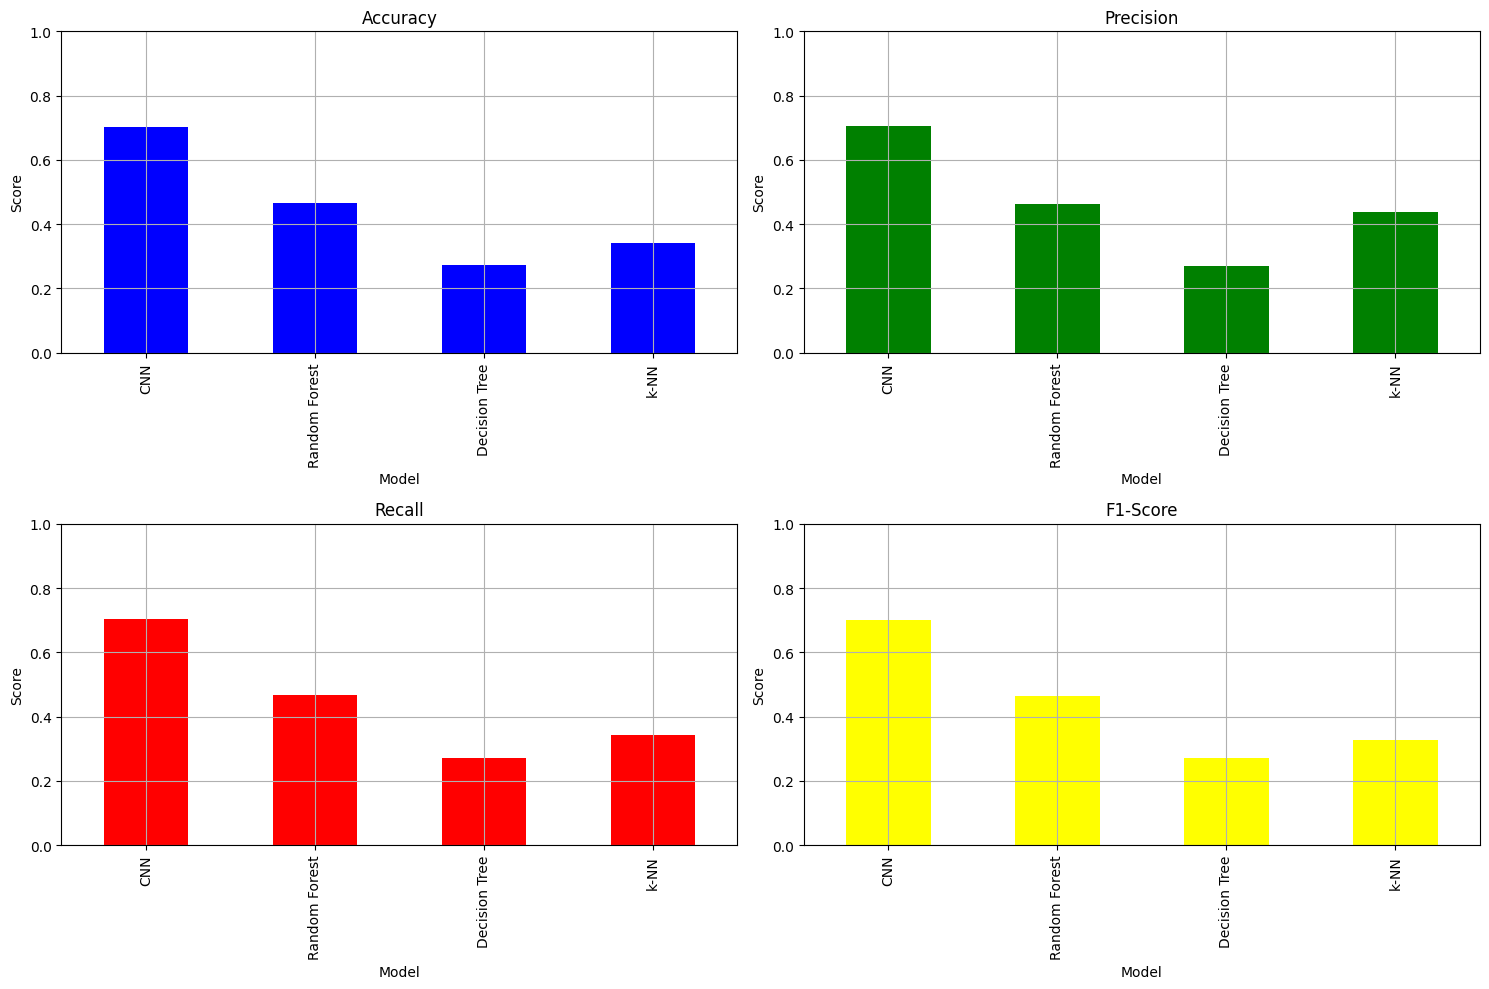

In [1]:
# matris işleme kütüphanelerini yüklüyoruz
import numpy as np
import pandas as pd

#görselleştirme kütüphanesini yüklüyoruz
import matplotlib.pyplot as plt

#yapay zeka modelleri kütüphanelerini yüklüyoruz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyip verileri train/test olarak ikiye ayırıyoruz
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# CNN Modeli için veriyi yeniden şekillendirip normalize ediyoruz
X_train_cnn = X_train.astype('float32') / 255.0
X_test_cnn = X_test.astype('float32') / 255.0
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Düzleştirilmiş verileri normalize ediyoruz
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Etiketleri tek boyutlu hale getiriyoruz
y_train = y_train.flatten()
y_test = y_test.flatten()

# CNN modelini oluşturuyoruz
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# CNN Modelini eğitip değerlendiriyoruz
print("Training CNN...")
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn), verbose=2)
cnn_y_pred = cnn_model.predict(X_test_cnn).argmax(axis=1)

cnn_report = classification_report(y_test, cnn_y_pred, output_dict=True)
cnn_accuracy = cnn_report["accuracy"]
cnn_precision = np.mean([cnn_report[str(i)]["precision"] for i in range(10)])
cnn_recall = np.mean([cnn_report[str(i)]["recall"] for i in range(10)])
cnn_f1_score = np.mean([cnn_report[str(i)]["f1-score"] for i in range(10)])

metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
cnn_metrics = pd.DataFrame([{
    "Model": "CNN",
    "Accuracy": cnn_accuracy,
    "Precision": cnn_precision,
    "Recall": cnn_recall,
    "F1-Score": cnn_f1_score
}])
metrics = pd.concat([metrics, cnn_metrics], ignore_index=True)

print(f"\nPerformance for CNN:")
print(classification_report(y_test, cnn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, cnn_y_pred))
print("\n" + "-"*50 + "\n")

# CNN Modelinin sonuçlarını diğer ML algoritmaları ile kıyaslamak için 3 farklı algoritma tanımlıyoruz
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier()
}

# Diğer modelleri tek tek eğitip score ları hesaplıyoruz
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_flat, y_train)
    y_pred = model.predict(X_test_flat)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    precision = np.mean([report[str(i)]["precision"] for i in range(10)])
    recall = np.mean([report[str(i)]["recall"] for i in range(10)])
    f1_score = np.mean([report[str(i)]["f1-score"] for i in range(10)])

    model_metrics = pd.DataFrame([{
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }])

    metrics = pd.concat([metrics, model_metrics], ignore_index=True)

    print(f"\nPerformance for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# Performans skorlarını birbirleriyle kıyaslamak için tabloyu yazdırıyoruz
print(metrics)

# Performans skorlarını görselleştiriyoruz
metrics.set_index("Model", inplace=True)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

metrics["Accuracy"].plot(kind="bar", ax=axs[0, 0], color='blue', title="Accuracy")
metrics["Precision"].plot(kind="bar", ax=axs[0, 1], color='green', title="Precision")
metrics["Recall"].plot(kind="bar", ax=axs[1, 0], color='red', title="Recall")
metrics["F1-Score"].plot(kind="bar", ax=axs[1, 1], color='yellow', title="F1-Score")

for ax in axs.flat:
    ax.set_ylim(0, 1)
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.grid(True)

plt.tight_layout()
plt.show()
